# Acoustic inhomogeneous model

The general wave equation is derived from the equation of motion

\begin{equation} \label{eq:eq_of_motion}
\frac{\partial T}{\partial x} = \rho \frac{\partial^2 u}{\partial t^2}, 
\end{equation}

where $T, x, u$ and $t$ denote the stress, position, displacement and time. Consider Hooke's law

$T = c \frac{\partial u }{\partial x}$

where $c$ is the stiffness coefficient. If we substitute this equation into equation \eqref{eq_of_motion}(above) and assume $c$ to vary with $x$, we obtain 

\begin{equation} \label{eq:hooke_substituted}
\rho \frac{\partial^2 u}{\partial t^2} = \frac{\partial}{\partial x}\left( c \frac{\partial u }{\partial x}  \right)
\end{equation}

where the comma followed by a $x$ denotes If we assume the modes to be stationary, we can substitute $u(x,t) = u(x) e^{i \omega t}$ into equation \ref{eq:hooke_substituted} and divide by $e^{i \omega t}$ to obtain:

\begin{equation} \label{eq:inhom_ac_stat}
- \rho \omega^2 u = \frac{\partial}{\partial x}\left( c \frac{\partial u }{\partial x}  \right)
\end{equation}

Which we can solve numerically by writing it as an eigenvalue problem using the finite difference method. This will result in 

$$
(-\pmb{\rho} \circ I) \omega^2 \mathbf{u} = A \mathbf{u},
$$

where 

$$
-\pmb{\rho} \circ I = -
\begin{bmatrix}
\rho_1 &  & & \\
 & \rho_2 & &0\\
& & \ddots &\\
&0 & & & \rho_{N}
\end{bmatrix}
$$

This is the generalized eigenvalue problem. If only $\rho$ is homogeneous and only $c$ is inhomogeneous, $\pmb{\rho} \circ I$ reduces to $\rho I$ and the problem just becomes

$$
-\rho \omega^2 \mathbf{u} = A \mathbf{u}
$$

Which is a regular eigenvalue problem. If it is the other way around and $c$ is constant, while $\rho$ is inhomogeneous, A just reduces to central difference 1D laplacian which we have studied in the homogeneous acoustic model. 

#### inhomogeneous stiffness

On the right hand side of equation \eqref{eq:inhom_ac_stat} the differential operator operates on both the mechanical displacement and the stiffness coefficient. We need a different finite difference discretization than what we have seen up to now. Preferably this discretization results in a symmetric system matrix, such that we certainly find real eigenfrequencies. Let us now consider this right hand side in general form with coefficient $k$

$$
\frac{\partial}{\partial x}\left(k \frac{\partial y}{\partial x}\right)_i,
$$

where $x$ denotes the position, $y=y(x)$ is the solution, and $k=k(x)$ is a space dependent coefficient. If we define 

$$
a_i = \frac{k(x_i) + k(x_{i-1})}{2}
$$

We then find that <font color = "red">Have not derived this myself, but will do this<font color = "black">

$$
\frac{\partial}{\partial x}\left(k \frac{\partial y}{\partial x}\right)_i = \frac{1}{h^2} \left[a_{i} u_{i-1} -(a_{i} + a_{i+1}) u_{i} + a_{i+1} u_{i+1}\right] + \mathcal{O}(h^2)
$$

So the equations near the boundary (i=1, N-2) for 0-dirichlet boundary conditions become:


$$
\frac{\partial}{\partial x}\left(k \frac{\partial y}{\partial x}\right)_1 = \frac{1}{h^2} \left[ -(a_{1} + a_{2}) u_{1} + a_{2} u_{2}\right] + \mathcal{O}(h^2)
$$

$$
\frac{\partial}{\partial x}\left(k \frac{\partial y}{\partial x}\right)_{N-2} = \frac{1}{h^2} \left[a_{N-2} u_{N-3} -(a_{N-2} + a_{N-1}) u_{N-2}\right] + \mathcal{O}(h^2)
$$

And for 0-neumann boundary conditions they become:
$$
\frac{\partial}{\partial x}\left(k \frac{\partial y}{\partial x}\right)_1 = \frac{1}{h^2} \left[-a_{2} u_{1} + a_{2} u_{2}\right] + \mathcal{O}(h^2)
$$

$$
\frac{\partial}{\partial x}\left(k \frac{\partial y}{\partial x}\right)_{N-2} = \frac{1}{h^2} \left[a_{N-2} u_{N-3} -(a_{N-2}) u_{N-2}\right] + \mathcal{O}(h^2)
$$






### Varying stiffness coefficient

In [12]:
import numpy as np
import matplotlib.pylab as plt
from time import time
import scipy.linalg as la

In [33]:
#Number of points 
N = 1000

#Range 
x0 = 0 
x1 = 500e-6

#create x array
x = np.linspace(x0,x1,N)

#Determine the spacing
dx = x[1] - x[0]

#switch point
xs = (x1-x0)/2

#coefficients
rho = np.ones(N)
c = np.ones(N)
switch_i = np.where(x>xs)
c[switch_i] = 10
rho[switch_i] = 5

#compute derivative
a = (c[1:] + c[:-1]) / 2

#slice because the b.c. points are not in the state vector
c = c[1:-1]
rho = rho[1:-1]

#FD varying coefficient
main = - a[:-1] - a[1:]
main[0] = -a[1]; main[-1] = -a[-2]
off = a[1:-1]

#make the LHS matrix
M = 1 / (dx**2) * (np.diag(main, k=0) + np.diag(off,k=1) + np.diag(off,k=-1))

#make the matrix with rho on diagonal
RHO = np.diag(rho,k=0)

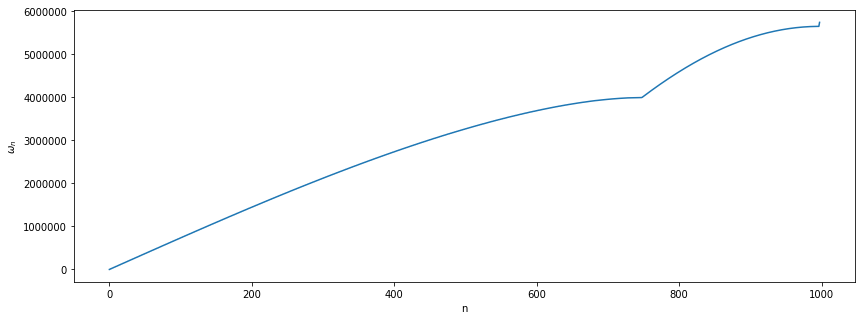

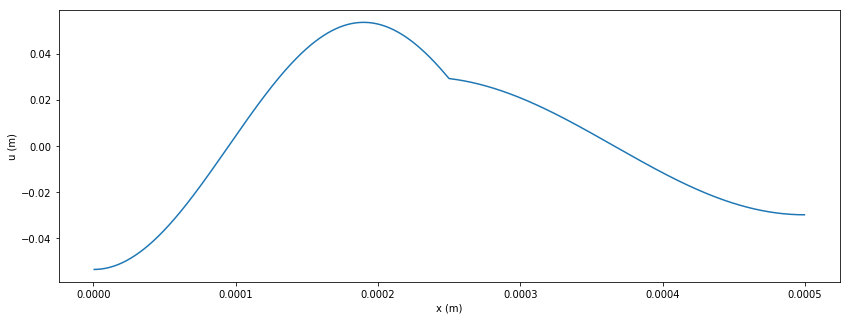

In [34]:
#find the values and vectors from the generalized eigenvalue solver
eigvals, eigvecs = la.eig(a = M, b=-RHO)

#sort them
vecs_sort = eigvecs[:,np.argsort(eigvals)]
freq_sort = np.sort(np.sqrt(eigvals))

#plot eigenfrequencies
plt.figure(figsize=(14,5))
plt.plot(freq_sort.real)
plt.xlabel("n")
plt.ylabel("$\omega_n$")
plt.show()

#plot eigenvectors
plt.figure(figsize=(14,5))
plt.plot(x[1:-1],vecs_sort[:,2])
plt.xlabel("x (m)")
plt.ylabel("u (m)")
plt.show()